In [111]:
import pandas as pd
import numpy as np

In [112]:
data = pd.read_csv("Parking_regulations__except_non-metered_color_curb_.csv")

# Chosing the most usefull columns - description
- ID column contains only nan and 0.0 values so we delete it
- HOURS contains the same information as HRS_BEGIN + HRS_END but in worse data format so we chose HRS_BEGIN & HOURS_END insted of HOURS
- Agency contains only 97 non-null values, which is only 1.2% of our data so we delete it
- HRS_BEGIN is the same as FROM_TIME but it has less null values and data format is better for us if we want to use this data set for some ML - example: 
    - 3am in FROM_TIME = 300 in HRS_BEGIN, 3pm in FROM_TIME = 1500 in HRS_BEGIN
- HRS_END is better than TIME_TO on the same basis as the above

In [113]:
columns = ['REGULATION', 'DAYS', 'HRS_BEGIN', 'HRS_END', 'HRLIMIT', 'LAST_EDITED_USER', 'LAST_EDITED_DATE', 'EXCEPTIONS', 'shape']

In [114]:
df = data[columns]

In [115]:
df.head()

,REGULATION,DAYS,HRS_BEGIN,HRS_END,HRLIMIT,LAST_EDITED_USER,LAST_EDITED_DATE,EXCEPTIONS,shape
0,Time limited,M-Sa,700.0,1800.0,1.0,MTA,20170513001346,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.49074 37.74207, -122.49..."
1,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232238,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38895 37.742348, -122.3..."
2,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232234,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38897 37.742317, -122.3..."
3,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232309,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.388504 37.74297, -122.3..."
4,No parking any time,NaN,NaN,NaN,NaN,RAYNELLCOOPER,20191031234514,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38898 37.764225, -122.3..."


In [116]:
print(df.REGULATION)

0              Time limited
1              Time limited
2              Time limited
3              Time limited
4       No parking any time
               ...         
7742      Government permit
7743      Government permit
7744      Government permit
7745      Government permit
7746      Government permit
Name: REGULATION, Length: 7747, dtype: object


# Remove the rows containing an empty value in REGULATION

In [117]:
df.dropna(how = "any", subset = ["REGULATION"], inplace = True)
# rows_to_drop_indexes = []
# for index, row in df.iterrows():
#     if pd.isnull(row.REGULATION):
#         rows_to_drop_indexes.append(index)
# print(rows_to_drop_indexes)

<ipython-input-117-85d1ac54c3c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how = "any", subset = ["REGULATION"], inplace = True)


In [118]:
# df = df.drop(df.index[rows_to_drop_indexes])

In [119]:
df.head()

,REGULATION,DAYS,HRS_BEGIN,HRS_END,HRLIMIT,LAST_EDITED_USER,LAST_EDITED_DATE,EXCEPTIONS,shape
0,Time limited,M-Sa,700.0,1800.0,1.0,MTA,20170513001346,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.49074 37.74207, -122.49..."
1,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232238,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38895 37.742348, -122.3..."
2,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232234,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38897 37.742317, -122.3..."
3,Time limited,M-F,900.0,1800.0,4.0,GCHAN,20190820232309,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.388504 37.74297, -122.3..."
4,No parking any time,NaN,NaN,NaN,NaN,RAYNELLCOOPER,20191031234514,None. Regulation applies to all vehicles.,"MULTILINESTRING ((-122.38898 37.764225, -122.3..."


# Lower case
As we can see below in not-number data we have duplicates like 'Time limited' and 'Time LImited' which are done by case sensitivity so we want to transform all strings into lower case

In [120]:
regulations = np.unique([reg for reg in df.REGULATION if not pd.isnull(reg)])
for regulation in regulations:
    print(regulation)

Government Permit
Government permit
Limited No Parking
No Oversized Vehicles
No Parking Anytime
No Stopping
No overnight parking
No oversized vehicles
No parking any time
Paid + Permit
Time LImited
Time Limited
Time limited


In [121]:
string_cols = ['REGULATION', 'DAYS', 'LAST_EDITED_USER', 'EXCEPTIONS']
for column in string_cols:
    df[column] = df[column].str.lower()
# for col in string_cols:
#     for value in df[col]:
#         if isinstance(value, str):
#             df[col] = 

<ipython-input-121-dbb70f597291>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.lower()


In [122]:
df.head()

,REGULATION,DAYS,HRS_BEGIN,HRS_END,HRLIMIT,LAST_EDITED_USER,LAST_EDITED_DATE,EXCEPTIONS,shape
0,time limited,m-sa,700.0,1800.0,1.0,mta,20170513001346,none. regulation applies to all vehicles.,"MULTILINESTRING ((-122.49074 37.74207, -122.49..."
1,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232238,none. regulation applies to all vehicles.,"MULTILINESTRING ((-122.38895 37.742348, -122.3..."
2,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232234,none. regulation applies to all vehicles.,"MULTILINESTRING ((-122.38897 37.742317, -122.3..."
3,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232309,none. regulation applies to all vehicles.,"MULTILINESTRING ((-122.388504 37.74297, -122.3..."
4,no parking any time,NaN,NaN,NaN,NaN,raynellcooper,20191031234514,none. regulation applies to all vehicles.,"MULTILINESTRING ((-122.38898 37.764225, -122.3..."


# Data unification - change "No parking any time" to "No parking anytime"

In [123]:
df["REGULATION"].replace({"no parking any time": "no parking anytime"}, inplace=True)

<ipython-input-123-e4e82fe4b18d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["REGULATION"].replace({"no parking any time": "no parking anytime"}, inplace=True)


# Remove the rows containing an empty value in shape

In [124]:
df.dropna(how = "any", subset = ["shape"], inplace = True)
# rows_to_drop_indexes = []
# for index, row in df.iterrows():
#     if pd.isnull(row['shape']):
#         rows_to_drop_indexes.append(index)
# print(rows_to_drop_indexes)

<ipython-input-124-5eb027e99191>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how = "any", subset = ["shape"], inplace = True)


In [125]:
# df = df.drop(df.index[rows_to_drop_indexes])

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 7746
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REGULATION        7723 non-null   object 
 1   DAYS              7455 non-null   object 
 2   HRS_BEGIN         7635 non-null   float64
 3   HRS_END           7635 non-null   float64
 4   HRLIMIT           7472 non-null   float64
 5   LAST_EDITED_USER  7723 non-null   object 
 6   LAST_EDITED_DATE  7723 non-null   int64  
 7   EXCEPTIONS        7617 non-null   object 
 8   shape             7723 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 603.4+ KB


# Get regulations names

In [127]:
regulations = np.unique([reg for reg in df.REGULATION if not pd.isnull(reg)])
print(regulations)

['government permit' 'limited no parking' 'no overnight parking'
 'no oversized vehicles' 'no parking anytime' 'no stopping'
 'paid + permit' 'time limited']


In [128]:
shapes = [[row['shape'] for _, row in df.iterrows() if row.REGULATION == reg] for reg in regulations]


# Create dictionary regulation_name: shape

In [129]:
shapes_dict = {reg: shape for reg, shape in zip(regulations, shapes)}


# Open Street Map

In [130]:
import geopandas as gpd
from shapely.geometry import multilinestring
from shapely import wkt

In [131]:
df['shape'] = df['shape'].apply(wkt.loads)

<ipython-input-131-59dc1a808019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shape'] = df['shape'].apply(wkt.loads)


In [132]:
geo_df = gpd.GeoDataFrame(df, geometry=df['shape'])

In [133]:
geo_df

D:\Anaconda\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
D:\Anaconda\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
D:\Anaconda\lib\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
D:\Anaconda\lib\site-packages\pandas\io\formats\printing.py:121: ShapelyDeprecationWarning: __

,REGULATION,DAYS,HRS_BEGIN,HRS_END,HRLIMIT,LAST_EDITED_USER,LAST_EDITED_DATE,EXCEPTIONS,shape,geometry
0,time limited,m-sa,700.0,1800.0,1.0,mta,20170513001346,none. regulation applies to all vehicles.,"(LINESTRING (-122.49074 37.74207, -122.490746 ...","MULTILINESTRING ((-122.49074 37.74207, -122.49..."
1,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232238,none. regulation applies to all vehicles.,"(LINESTRING (-122.38895 37.742348, -122.38822 ...","MULTILINESTRING ((-122.38895 37.74235, -122.38..."
2,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232234,none. regulation applies to all vehicles.,"(LINESTRING (-122.38897 37.742317, -122.38824 ...","MULTILINESTRING ((-122.38897 37.74232, -122.38..."
3,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232309,none. regulation applies to all vehicles.,"(LINESTRING (-122.388504 37.74297, -122.38902 ...","MULTILINESTRING ((-122.38850 37.74297, -122.38..."
4,no parking anytime,NaN,NaN,NaN,NaN,raynellcooper,20191031234514,none. regulation applies to all vehicles.,"(LINESTRING (-122.38898 37.764225, -122.38886 ...","MULTILINESTRING ((-122.38898 37.76423, -122.38..."
...,...,...,...,...,...,...,...,...,...,...
7742,government permit,NaN,0.0,0.0,NaN,joelmandella,20180221010035,sfpd vehicles with a permit from the sfmta all...,"(LINESTRING (-122.431915 37.78001, -122.43196 ...","MULTILINESTRING ((-122.43192 37.78001, -122.43..."
7743,government permit,NaN,0.0,0.0,0.0,mta,20160909230726,NaN,"(LINESTRING (-122.40362 37.77529, -122.403206 ...","MULTILINESTRING ((-122.40362 37.77529, -122.40..."
7744,government permit,NaN,0.0,0.0,0.0,mta,20160909230528,NaN,"(LINESTRING (-122.40477 37.774487, -122.40455 ...","MULTILINESTRING ((-122.40477 37.77449, -122.40..."
7745,government permit,NaN,0.0,0.0,NaN,joelmandella,20180103003553,NaN,"(LINESTRING (-122.412445 37.783684, -122.41247...","MULTILINESTRING ((-122.41245 37.78368, -122.41..."


In [134]:
from pyrosm import get_data
from pyrosm import OSM

In [135]:
sf = get_data("San Francisco")

In [136]:
print(sf)

C:\Users\Piotr\AppData\Local\Temp\pyrosm\SanFrancisco.osm.pbf


<AxesSubplot:>

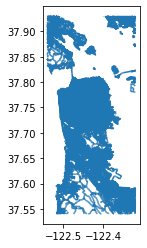

In [137]:
osm = OSM(sf)
roads = osm.get_network()
roads.plot()

In [138]:
roads.head()

,access,area,bicycle,bridge,busway,cycleway,est_width,foot,footway,highway,...,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,None,None,None,None,None,None,None,residential,...,None,None,None,5004035,0,-1,None,way,"MULTILINESTRING ((-122.41648 37.79905, -122.41...",75.0
1,None,None,None,None,None,None,None,None,None,residential,...,None,None,None,7373728,0,-1,None,way,"MULTILINESTRING ((-122.40013 37.77428, -122.40...",98.0
2,None,None,None,None,None,None,None,None,None,residential,...,None,None,None,7373736,0,-1,"{""name:etymology:wikidata"":""Q107178240""}",way,"MULTILINESTRING ((-122.40013 37.77428, -122.39...",534.0
3,None,None,None,None,None,None,None,None,None,residential,...,None,None,None,7448875,0,-1,"{""name:etymology:wikidata"":""Q16105754""}",way,"MULTILINESTRING ((-122.39110 37.76967, -122.39...",147.0
4,None,None,None,None,None,None,None,None,None,track,...,None,None,None,7715657,0,-1,"{""created_by"":""JOSM"",""motorcycle"":""no""}",way,"MULTILINESTRING ((-122.32459 37.88995, -122.32...",274.0


<AxesSubplot:>

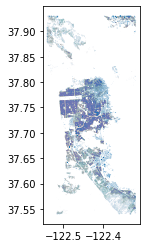

In [139]:
buildings = osm.get_buildings()
buildings.plot()

In [140]:
buildings.head()

,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:street,email,name,opening_hours,...,start_date,wikipedia,id,timestamp,version,geometry,tags,osm_type,addr:place,changeset
0,None,None,None,None,None,None,None,None,None,None,...,None,None,8915166,0,-1,"POLYGON ((-122.43349 37.79001, -122.43345 37.7...",None,way,NaN,NaN
1,None,None,None,None,None,None,None,None,None,None,...,None,None,23652511,0,-1,"POLYGON ((-122.34144 37.59000, -122.34103 37.5...",None,way,NaN,NaN
2,None,None,None,None,None,None,None,None,None,None,...,None,None,23652518,0,-1,"POLYGON ((-122.34916 37.59104, -122.34940 37.5...",None,way,NaN,NaN
3,None,None,None,None,None,None,None,None,None,None,...,None,None,23652522,0,-1,"POLYGON ((-122.35737 37.59113, -122.35655 37.5...","{""area"":""yes""}",way,NaN,NaN
4,None,None,None,None,None,None,None,None,None,None,...,None,None,23652526,0,-1,"POLYGON ((-122.33958 37.58877, -122.33953 37.5...",None,way,NaN,NaN


In [141]:
roads.columns

Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway',
       'est_width', 'foot', 'footway', 'highway', 'junction', 'lanes', 'lit',
       'maxspeed', 'motorcar', 'motor_vehicle', 'name', 'oneway', 'overtaking',
       'path', 'psv', 'ref', 'service', 'segregated', 'sidewalk', 'smoothness',
       'surface', 'tracktype', 'tunnel', 'turn', 'width', 'id', 'timestamp',
       'version', 'tags', 'osm_type', 'geometry', 'length'],
      dtype='object')

In [142]:
buildings.columns

Index(['addr:city', 'addr:country', 'addr:full', 'addr:housenumber',
       'addr:housename', 'addr:postcode', 'addr:street', 'email', 'name',
       'opening_hours', 'operator', 'phone', 'ref', 'url', 'website',
       'building', 'amenity', 'building:flats', 'building:levels',
       'building:material', 'building:min_level', 'building:use', 'craft',
       'height', 'internet_access', 'landuse', 'levels', 'office', 'shop',
       'source', 'start_date', 'wikipedia', 'id', 'timestamp', 'version',
       'geometry', 'tags', 'osm_type', 'addr:place', 'changeset'],
      dtype='object')

In [143]:
roads_usefull_cols = ['access', 'highway', 'name', 'geometry']
cleaned_roads = roads[roads_usefull_cols]

In [144]:
cleaned_roads.head()

,access,highway,name,geometry
0,None,residential,Macondray Lane,"MULTILINESTRING ((-122.41648 37.79905, -122.41..."
1,None,residential,6th Street,"MULTILINESTRING ((-122.40013 37.77428, -122.40..."
2,None,residential,Bluxome Street,"MULTILINESTRING ((-122.40013 37.77428, -122.39..."
3,None,residential,Nelson Rising Lane,"MULTILINESTRING ((-122.39110 37.76967, -122.39..."
4,None,track,None,"MULTILINESTRING ((-122.32459 37.88995, -122.32..."


In [192]:
combined_df = gpd.sjoin_nearest(geo_df, cleaned_roads)

<ipython-input-192-ef4cb41ea56f>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  combined_df = gpd.sjoin_nearest(geo_df, cleaned_roads)
D:\Anaconda\lib\site-packages\geopandas\array.py:341: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


In [193]:
combined_df

D:\Anaconda\lib\site-packages\pandas\core\dtypes\inference.py:383: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
D:\Anaconda\lib\site-packages\pandas\core\dtypes\inference.py:384: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
D:\Anaconda\lib\site-packages\pandas\io\formats\printing.py:117: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  s = iter(seq)
D:\Anaconda\lib\site-packages\pandas\io\formats\printing.py:121: ShapelyDeprecationWarning: __

,REGULATION,DAYS,HRS_BEGIN,HRS_END,HRLIMIT,LAST_EDITED_USER,LAST_EDITED_DATE,EXCEPTIONS,shape,geometry,index_right,access,highway,name
0,time limited,m-sa,700.0,1800.0,1.0,mta,20170513001346,none. regulation applies to all vehicles.,"(LINESTRING (-122.49074 37.74207, -122.490746 ...","MULTILINESTRING ((-122.49074 37.74207, -122.49...",27090,None,residential,33rd Avenue
1,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232238,none. regulation applies to all vehicles.,"(LINESTRING (-122.38895 37.742348, -122.38822 ...","MULTILINESTRING ((-122.38895 37.74235, -122.38...",46789,None,footway,None
2,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232234,none. regulation applies to all vehicles.,"(LINESTRING (-122.38897 37.742317, -122.38824 ...","MULTILINESTRING ((-122.38897 37.74232, -122.38...",46789,None,footway,None
1,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232238,none. regulation applies to all vehicles.,"(LINESTRING (-122.38895 37.742348, -122.38822 ...","MULTILINESTRING ((-122.38895 37.74235, -122.38...",738,None,primary,3rd Street
2,time limited,m-f,900.0,1800.0,4.0,gchan,20190820232234,none. regulation applies to all vehicles.,"(LINESTRING (-122.38897 37.742317, -122.38824 ...","MULTILINESTRING ((-122.38897 37.74232, -122.38...",27127,None,primary,3rd Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,government permit,NaN,0.0,0.0,0.0,mta,20160909230609,NaN,"(LINESTRING (-122.40382 37.776268, -122.4034 3...","MULTILINESTRING ((-122.40382 37.77627, -122.40...",2407,None,residential,Harriet Street
7743,government permit,NaN,0.0,0.0,0.0,mta,20160909230726,NaN,"(LINESTRING (-122.40362 37.77529, -122.403206 ...","MULTILINESTRING ((-122.40362 37.77529, -122.40...",2407,None,residential,Harriet Street
7742,government permit,NaN,0.0,0.0,NaN,joelmandella,20180221010035,sfpd vehicles with a permit from the sfmta all...,"(LINESTRING (-122.431915 37.78001, -122.43196 ...","MULTILINESTRING ((-122.43192 37.78001, -122.43...",38368,None,service,None
7744,government permit,NaN,0.0,0.0,0.0,mta,20160909230528,NaN,"(LINESTRING (-122.40477 37.774487, -122.40455 ...","MULTILINESTRING ((-122.40477 37.77449, -122.40...",54979,None,secondary,Bryant Street


<AxesSubplot:>

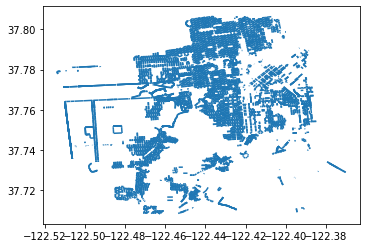

In [147]:
combined_df.plot()

# Regulation area plots

In [148]:
import matplotlib.pyplot as plt

government permit: red
limited no parking: orange
no overnight parking: purple
no oversized vehicles: yellow
no parking anytime: pink
no stopping: brown
paid + permit: green
time limited: blue


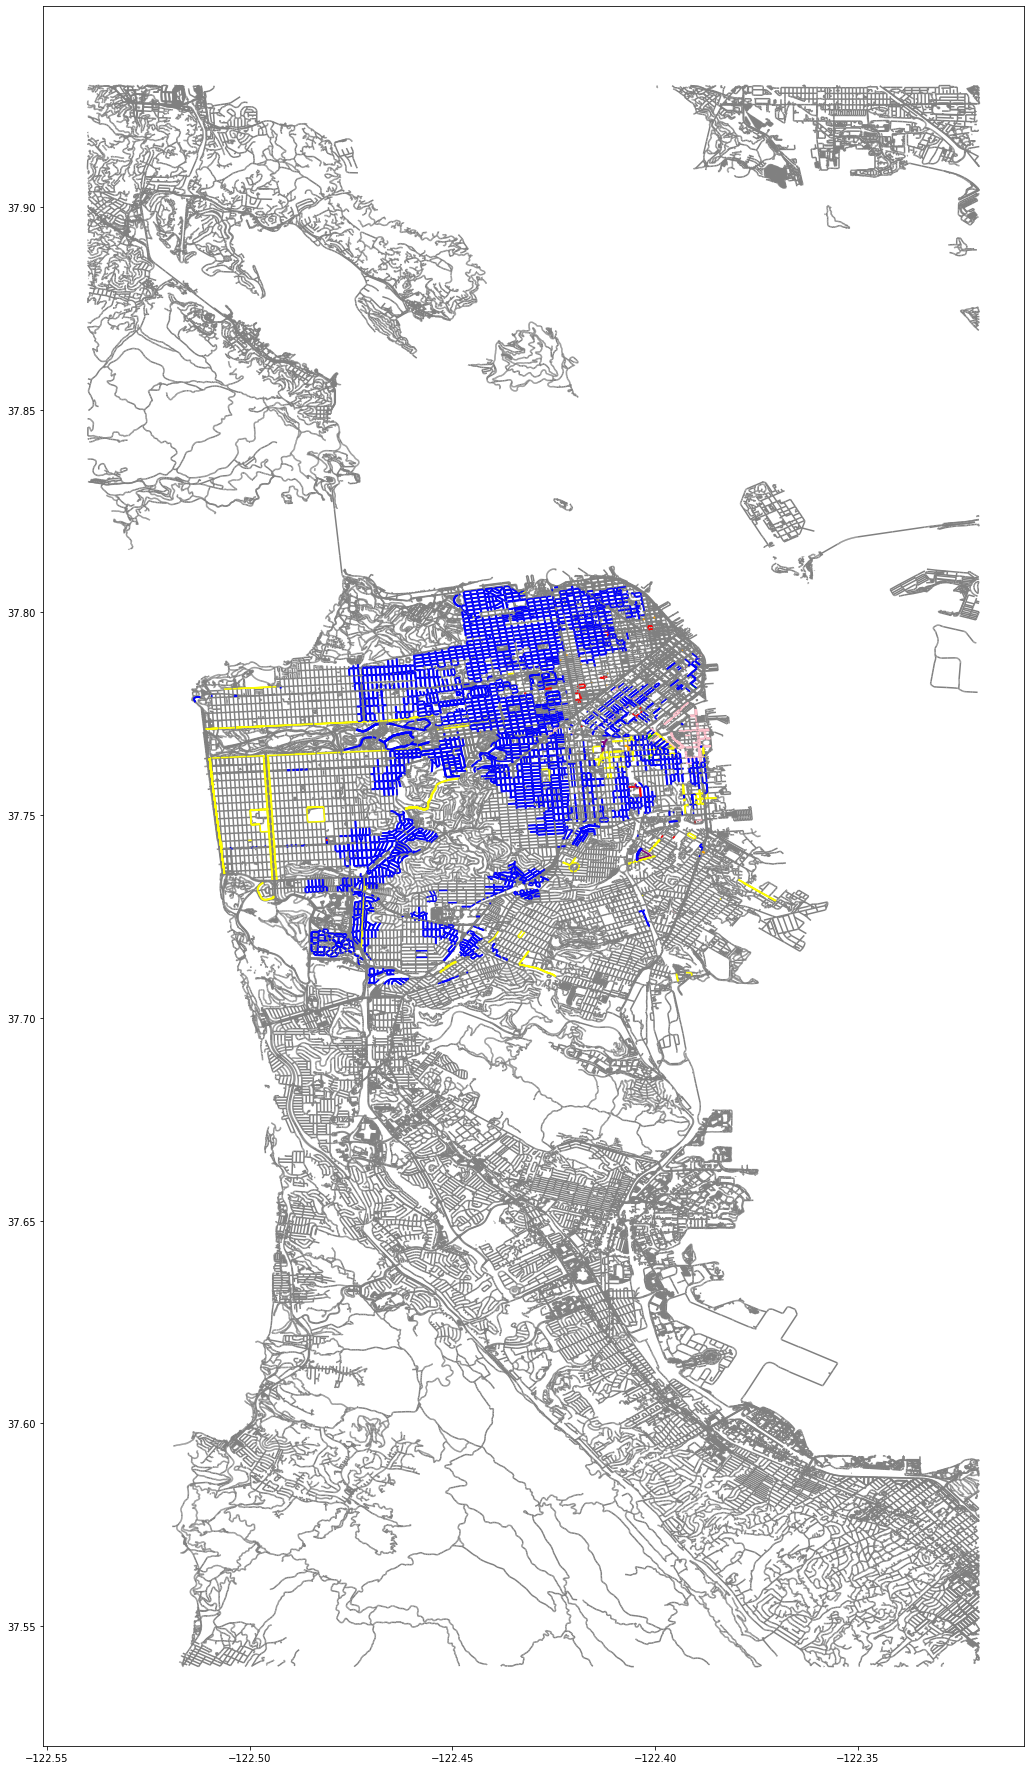

In [158]:
regulation_color = {"government permit" : "red",
                    "limited no parking" : "orange",
                    "no overnight parking" : "purple",
                    "no oversized vehicles" : "yellow",
                    "no parking anytime" : "pink",
                    "no stopping" : "brown",
                    "paid + permit" : "green",
                    "time limited" : "blue"}
fig, ax = plt.subplots(figsize = (40, 32))
roads.plot(ax=ax, color="gray")
for reg in regulations:
    print(reg + ": " + regulation_color[reg])
    tmp_df = combined_df[combined_df['REGULATION'] == reg]
    tmp_df.plot(ax=ax, color=regulation_color[reg])